<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-24 16:34:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.2’

survey-data.csv.2   100%[===================>] 152.13M  60.1MB/s    in 2.5s    

2025-11-24 16:34:33 (60.1 MB/s) - ‘survey-data.csv.2’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [3]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 183.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 201.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 147.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 170.1 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [4]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [13]:
# Check all column names
print(df.columns)


Index(['sql'], dtype='object')


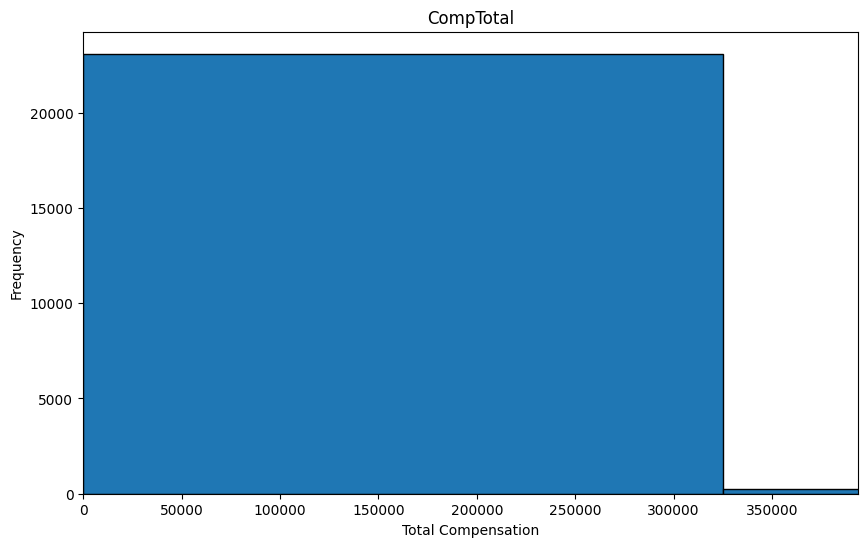

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Clean column names
df.columns = df.columns.str.strip()

# Drop missing values
comp = df['ConvertedCompYearly'].dropna()

# Plot histogram using Matplotlib
plt.figure(figsize=(10,6))
plt.hist(comp, bins=50, edgecolor='black')
plt.title('CompTotal')  # Title as requested
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.xlim(0, comp.quantile(0.99))  # limit x-axis to 99th percentile
plt.show()

**Box Plots**

Plot a box plot of Age.


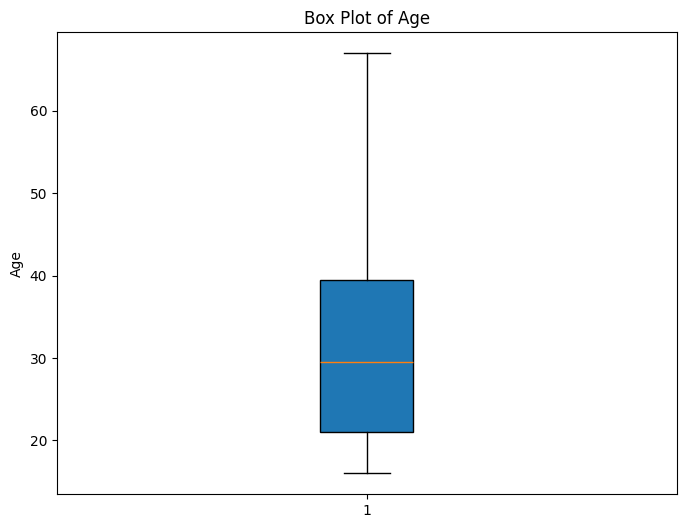

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Map age ranges to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}

df['AgeNumeric'] = df['Age'].map(age_map)

# Drop missing values
age_data = df['AgeNumeric'].dropna()

# Plot box plot
plt.figure(figsize=(8,6))
plt.boxplot(age_data, vert=True, patch_artist=True)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


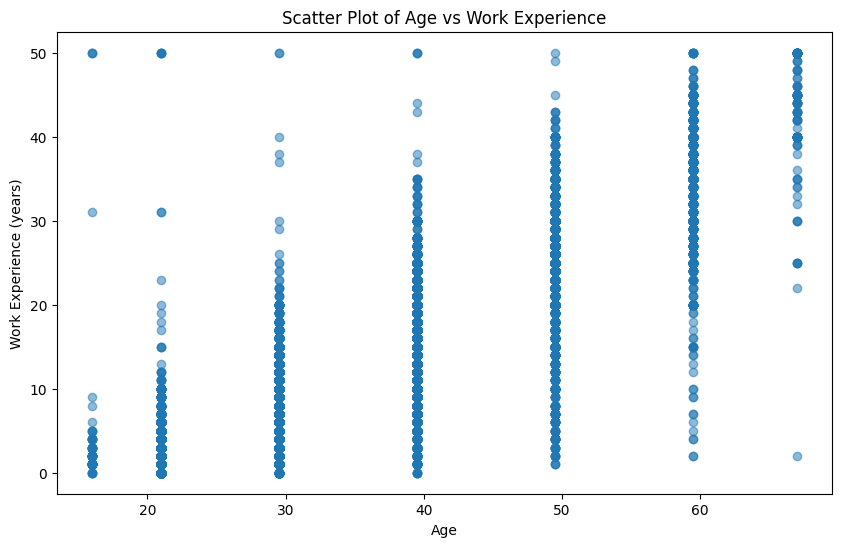

In [18]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Map age ranges to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Convert WorkExp to numeric (if it’s not)
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop rows with missing values in either column
scatter_data = df.dropna(subset=['AgeNumeric', 'WorkExp'])

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(scatter_data['AgeNumeric'], scatter_data['WorkExp'], alpha=0.5)
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (years)')
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [30]:
print("Non-missing rows for bubble plot:")
print(df[['TimeSearching', 'Frustration', 'Age']].dropna().shape[0])


Non-missing rows for bubble plot:
28085


Rows available for bubble plot: 0


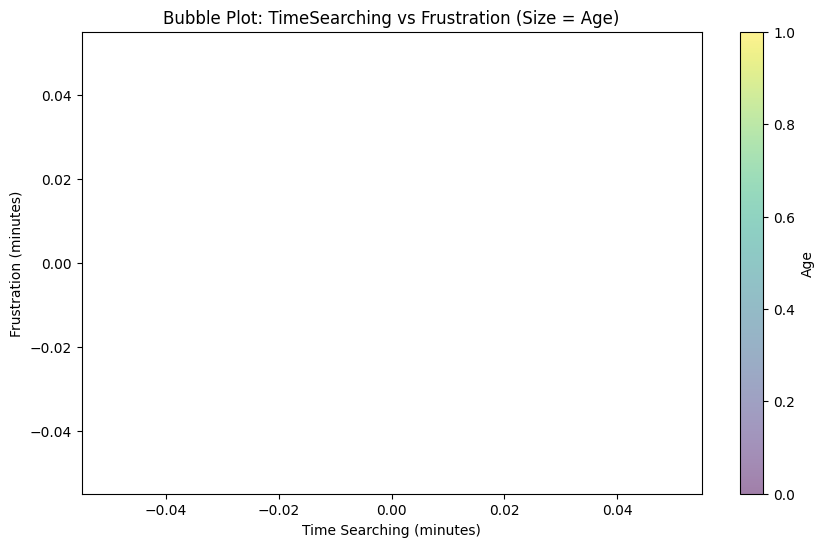

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Map age ranges to numeric midpoints for bubble size
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Strip and clean text columns
df['TimeSearching'] = df['TimeSearching'].astype(str).str.strip()
df['Frustration'] = df['Frustration'].astype(str).str.strip()

# Map TimeSearching and Frustration to numeric minutes
time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)
df['FrustrationNum'] = df['Frustration'].map(time_map)

# Keep only rows with valid numeric values
bubble_data = df.dropna(subset=['AgeNumeric', 'TimeSearchingNum', 'FrustrationNum'])

print(f"Rows available for bubble plot: {bubble_data.shape[0]}")  # sanity check

# Scale Age for bubble sizes
bubble_sizes = bubble_data['AgeNumeric'] * 5

# Plot
plt.figure(figsize=(10,6))
plt.scatter(
    bubble_data['TimeSearchingNum'],
    bubble_data['FrustrationNum'],
    s=bubble_sizes,
    alpha=0.5,
    c=bubble_data['AgeNumeric'],
    cmap='viridis'
)
plt.title('Bubble Plot: TimeSearching vs Frustration (Size = Age)')
plt.xlabel('Time Searching (minutes)')
plt.ylabel('Frustration (minutes)')
plt.colorbar(label='Age')
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


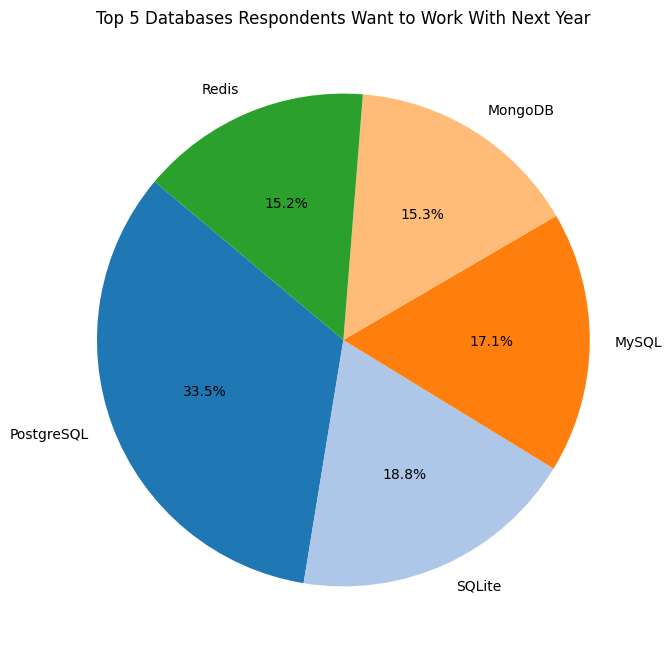

In [23]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Drop missing values
db_data = df['DatabaseWantToWorkWith'].dropna()

# Some respondents may have multiple databases separated by semicolons
# Split them and explode into separate rows
db_series = db_data.str.split(';').explode()

# Count frequencies
db_counts = db_series.value_counts().head(5)  # Top 5 databases

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    db_counts, 
    labels=db_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [26]:
# Check unique values in TimeSearching and TimeAnswering
print("Unique values in TimeSearching:")
print(df['TimeSearching'].dropna().unique())

print("\nUnique values in TimeAnswering:")
print(df['TimeAnswering'].dropna().unique())


Unique values in TimeSearching:
['30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']

Unique values in TimeAnswering:
['60-120 minutes a day' '15-30 minutes a day' '30-60 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']


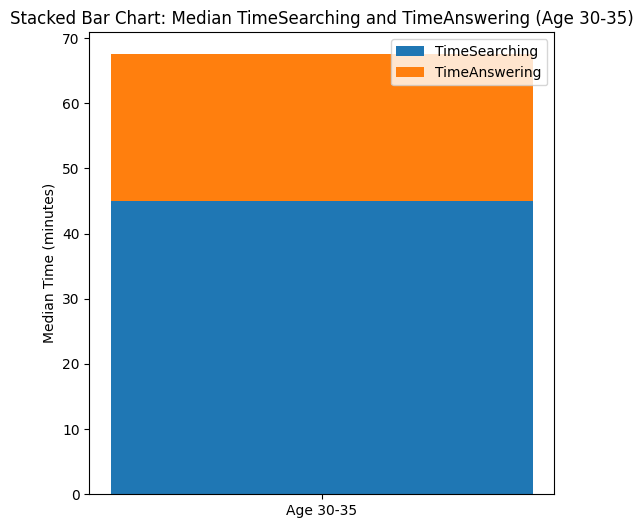

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Map time ranges to numeric minutes
time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)
df['TimeAnsweringNum'] = df['TimeAnswering'].map(time_map)

# Filter respondents in age ranges that cover 30-35
age_group = df[df['Age'].isin(['25-34 years old', '35-44 years old'])]

# Drop missing values
age_group = age_group.dropna(subset=['TimeSearchingNum', 'TimeAnsweringNum'])

# Compute medians
median_searching = age_group['TimeSearchingNum'].median()
median_answering = age_group['TimeAnsweringNum'].median()

# Plot stacked bar chart
plt.figure(figsize=(6,6))
plt.bar(
    ['Age 30-35'], 
    [median_searching], 
    label='TimeSearching'
)
plt.bar(
    ['Age 30-35'], 
    [median_answering], 
    bottom=[median_searching], 
    label='TimeAnswering'
)
plt.ylabel('Median Time (minutes)')
plt.title('Stacked Bar Chart: Median TimeSearching and TimeAnswering (Age 30-35)')
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


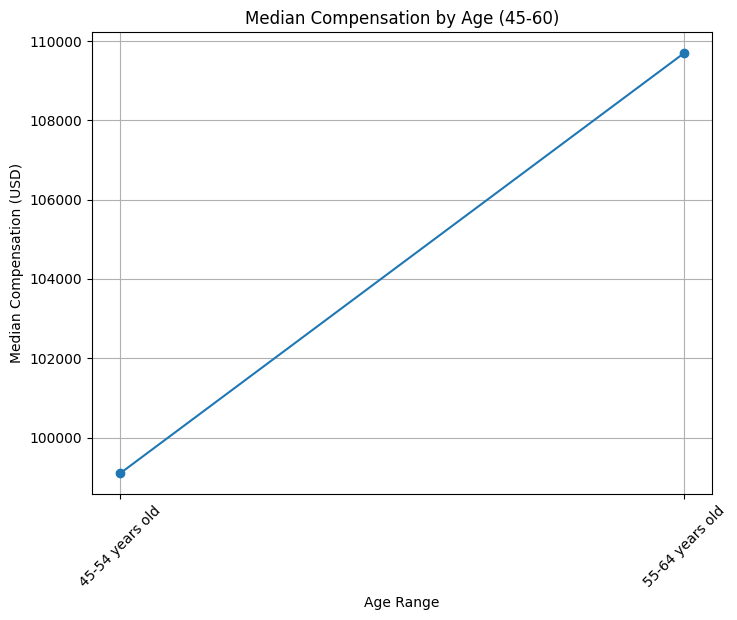

In [34]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Map age ranges to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Filter age ranges between 45 and 60
age_filtered = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

# Compute median compensation by age range
median_comp = age_filtered.groupby('Age')['ConvertedCompYearly'].median()

# Plot line chart
plt.figure(figsize=(8,6))
plt.plot(median_comp.index, median_comp.values, marker='o')
plt.title('Median Compensation by Age (45-60)')
plt.xlabel('Age Range')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Count frequency of each main branch
main_branch_counts = df['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(main_branch_counts.index, main_branch_counts.values, color='skyblue')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Number of Respondents by Main Branch')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
